# Visualizing Craft Brewery Data

Data set was originally posted [here](https://www.kaggle.com/nickhould/craft-cans)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_beer = pd.read_csv("C:\\Users\\Thomas\\Workspace 2\\beers.csv")
df_brew = pd.read_csv("C:\\Users\\Thomas\\Workspace 2\\breweries.csv")

df_brew['brewery_id'] = df_brew.index

df = df_beer.merge(df_brew, on="brewery_id")
print(df.head())

   Unnamed: 0_x    abv  ibu    id               name_x  \
0             0  0.050  NaN  1436             Pub Beer   
1             1  0.066  NaN  2265          Devil's Cup   
2             2  0.071  NaN  2264  Rise of the Phoenix   
3             3  0.090  NaN  2263             Sinister   
4             4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  Unnamed: 0_y  \
0             American Pale Lager         408    12.0           408   
1         American Pale Ale (APA)         177    12.0           177   
2                    American IPA         177    12.0           177   
3  American Double / Imperial IPA         177    12.0           177   
4                    American IPA         177    12.0           177   

                      name_y  city state  
0  10 Barrel Brewing Company  Bend    OR  
1        18th Street Brewery  Gary    IN  
2        18th Street Brewery  Gary    IN  
3        18th Street Brewery  Gary    IN  
4        

In [3]:
df = df.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})

## these 2 columns are just the index as well as the brewery ID repeated
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
## Make ABV a percentage for readability in the plots
df['abv'] = df['abv']*100
print(df.head())

   abv  ibu    id            beer_name                           style  \
0  5.0  NaN  1436             Pub Beer             American Pale Lager   
1  6.6  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  7.1  NaN  2264  Rise of the Phoenix                    American IPA   
3  9.0  NaN  2263             Sinister  American Double / Imperial IPA   
4  7.5  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces               brewery_name  city state  
0         408    12.0  10 Barrel Brewing Company  Bend    OR  
1         177    12.0        18th Street Brewery  Gary    IN  
2         177    12.0        18th Street Brewery  Gary    IN  
3         177    12.0        18th Street Brewery  Gary    IN  
4         177    12.0        18th Street Brewery  Gary    IN  


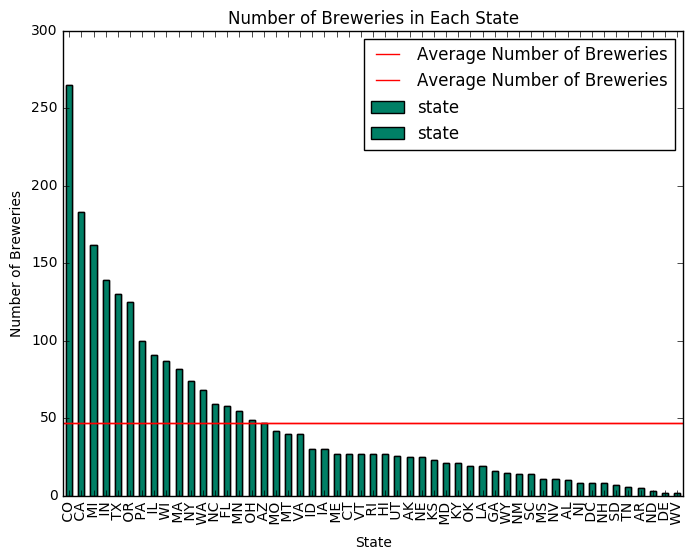

In [5]:
plot = df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(8,6), colormap='summer')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')
mean_line = plot.axhline(df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()
plt.show()
plt.clf()

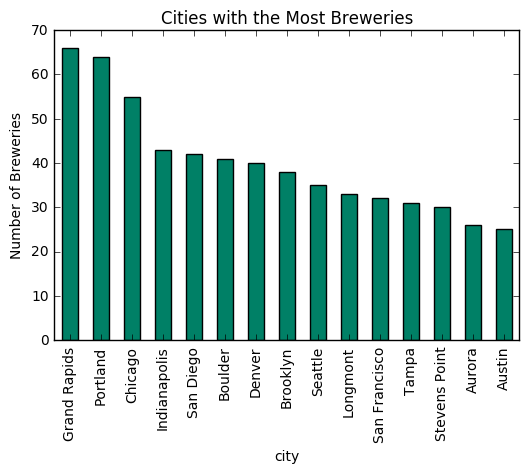

In [6]:
plot5 = df.groupby('city')['brewery_name'].count().nlargest(15).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='summer',  )
plot5.set_ylabel('Number of Breweries')
plt.show()
plt.clf()

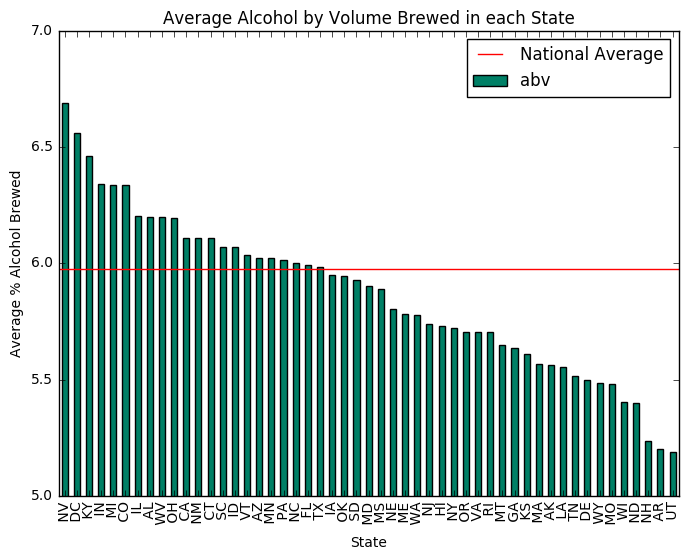

In [7]:
plot1 = df.groupby('state')['abv'].mean().sort_values(ascending=False).plot(kind='bar',\
                                                                    title="Average Alcohol by Volume Brewed in each State", \
                                                                    figsize=(8,6), ylim=(5, 7), colormap='summer')
plot1.set_xlabel('State')
plot1.set_ylabel('Average % Alcohol Brewed')
mean_line1 = plot1.axhline(df.abv.mean(), color='r',\
                         label='National Average')
plt.legend()
plt.show()
plt.clf()

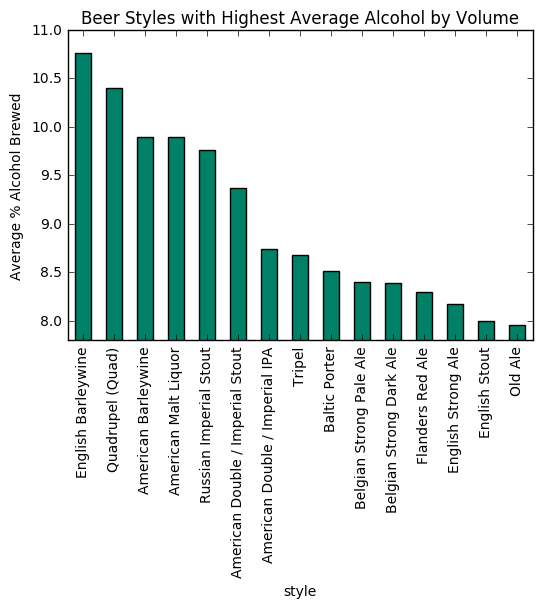

In [8]:
## print(df['style'].nunique())
## output: 99



plot2 = df.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar', \
               title='Beer Styles with Highest Average Alcohol by Volume', \
               colormap='summer', ylim=(7.8,11) )
plot2.set_ylabel('Average % Alcohol Brewed')
plt.show()
plt.clf()

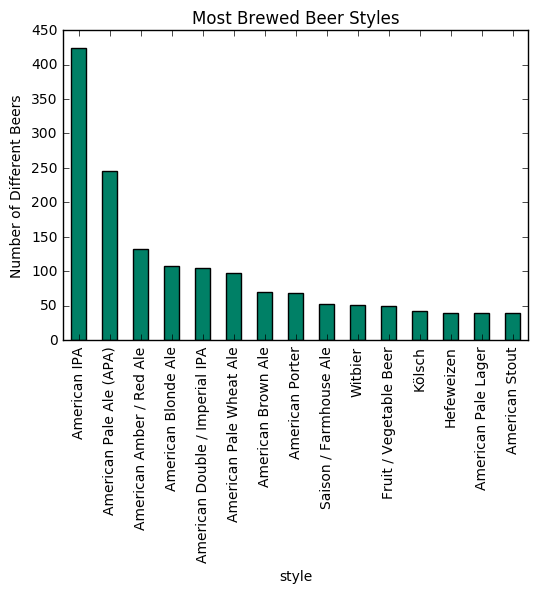

In [9]:
plot3 = df.groupby('style')['beer_name'].count().nlargest(15).plot(kind='bar', \
               title='Most Brewed Beer Styles', \
               colormap='summer',  )

plot3.set_ylabel('Number of Different Beers')
plt.show()
plt.clf()

## Takeaways
- Colorado has by far the most breweries in the US.
- Grand Rapids (MI), Portland (OR), and Chicago (IL) are the best places to visit if you are looking to tour a lot of breweries in one city.
- American IPAs are the most commonly brewed beer at Craft Breweries.
- Nevada, Washington, D.C., and Kentucky brew the strongest beers.